<a href="https://colab.research.google.com/github/raegar/ImageProcessing/blob/main/Image_compression_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Compression Techniques: Lossy vs Lossless
In this tutorial, we will explore the differences between lossy and lossless compression techniques, specifically focusing on **Discrete Cosine Transform (DCT)** for lossy compression.

Compression is essential when dealing with large data such as images, videos, and audio files. Compression reduces file size while retaining most of the essential information. There are two main types of compression:
- **Lossy Compression**: Some data is lost in the process, but the result is still acceptable for many applications. DCT is commonly used in JPEG image compression.
- **Lossless Compression**: No data is lost, meaning the original file can be perfectly reconstructed from the compressed version.




## 1. Discrete Cosine Transform (DCT) - Lossy Compression
DCT is used to transform spatial data into frequency data. By doing this, we can discard some of the less important frequencies (usually the higher ones) to achieve compression. JPEG uses DCT to compress images.

Let's walk through an example of how DCT is applied to compress an image.


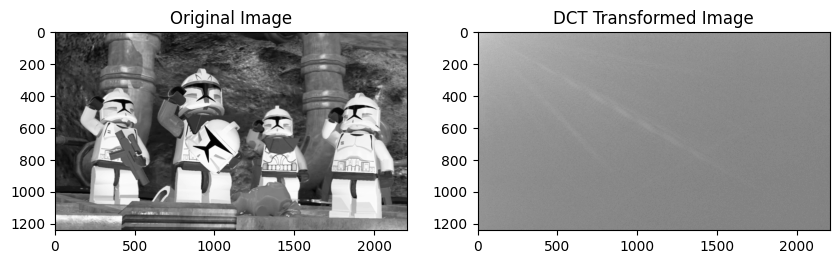

In [3]:

# Required imports
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load an example image
img = Image.open('example.png').convert('L')  # Convert to grayscale for simplicity
img_np = np.array(img)

# Apply 2D Discrete Cosine Transform (DCT)
dct = cv2.dct(np.float32(img_np))

# Show the original image and DCT transformed image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img_np, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("DCT Transformed Image")
plt.imshow(np.log(abs(dct)), cmap='gray')  # Log scale for better visualization

plt.show()



In the DCT transformed image, the top-left corner contains the most important frequencies (lower frequencies). The values further away from the top-left corner represent higher frequencies, which can be discarded without significantly affecting image quality.

### Applying Inverse DCT to reconstruct the image:
Now, let's apply the inverse DCT and see how the image can be reconstructed after discarding some of the higher frequencies.


<ipython-input-4-ffdbc364f9a6>:16: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(dct_compressed)), cmap='gray')


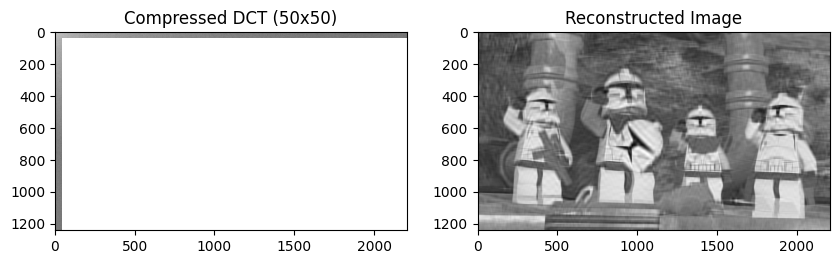

In [4]:

# Zero out the higher frequency components for compression
dct_compressed = np.copy(dct)
dct_compressed[50:, 50:] = 0  # Keep only the low-frequency components

# Apply a small constant to avoid log(0) issues
dct_compressed_log = np.log(np.abs(dct_compressed) + 1e-8)  # Add a small constant to avoid log(0)

# Apply inverse DCT to reconstruct the image
img_reconstructed = cv2.idct(dct_compressed)

# Show the compressed and reconstructed image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Compressed DCT (50x50)")
plt.imshow(np.log(abs(dct_compressed)), cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Reconstructed Image")
plt.imshow(img_reconstructed, cmap='gray')

plt.show()
